In [1]:
suppressMessages(library(Gleesso))

# Data 

data needed to infer a co-abundance graph are :
* the species taxonomy
* species abundance by samples
* eventually meta data for stratification

In [2]:
taxo_9.9_file = "./data/taxo_hs_9.9_3463_cleaned_CAG_sup50_freeze1.rds"

In [3]:
mgs_igc_ch_da_file = './data/MGS_IGC_healthy_CH_Da.rds'

In [12]:
meta_IGC = read.csv("./data/meta_IGC_healthy.csv")

# Infer one co-abundance graph

The gleesso pipeline function compute a co-abundance graph for samples in the MGS matrix. 

The  function parameters are of three kinds :
 
 1. Input files location
 2. Folders location for the output files
     * Graph file to the gephi format
     * Community composition and abundance file 
     * Spiec-easy graphical lasso model
 3. treshold for the selection of species
 4. a boolean vector for the selection of samples
 5. parameters for the spiec-easi pipeline

In [6]:
selection_vector = rep(TRUE, dim(readRDS(mgs_igc_ch_da_file))[2])

In [30]:
?Gleesso_pipeline

[1] "Starting Gleesso analysis for:"
[1] "#################   Gleesso_test_default_param   #################"
[1] "At analysis step :0"
[1] "Number of patient in the selection vector:"
[1] 477
[1] "mgs_tp"
[1] "Number of species:"
[1] 300


Normalizing/clr transformation of data with pseudocount ...
Inverse Covariance Estimation with glasso ...
Model selection with stars ...
Done!


[1] 0.2498979
[1] 0.01212932
[1] "###### Computing other community algorithm ######"
[1] "#####################################"
[1] "# Optimization of walktrap community#"
[1] "#####################################"
[1] "best number of steps:"
[1] 9
[1] "best modularity"
[1] 0.6863574
[1] "##### Modularity Walktrap:"
[1] 0.6863574
[1] "Modularity edge betweness:"
[1] 0.6127819
[1] "almost there"


GEXF graph successfully written at:
/home/hjulienne/Pipeline_development/Gleesso_pipeline/Gleesso_walkthrough/outputs/graph_Gleesso_testdefault_param.gexf


[1] "#############################"
[1] "#######  Community  #########"
[1] " Megamonas funiformis Escherichia coli"
[1] "Community number"
[1] 1
[1] "represented by:"
[1] " Megamonas funiformis Escherichia coli"
[1] "#############################"
[1] "#######  Community  #########"
[1] "Acinetobacter sp. CAG:196"
[1] "Community number"
[1] 12
[1] "represented by:"
[1] "Acinetobacter sp. CAG:196"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Akkermansia muciniphila Alistipes obesi"
[1] "Community number"
[1] 6
[1] "represented by:"
[1] " Akkermansia muciniphila Alistipes obesi"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Alistipes putredinis Barnesiella intestinihominis"
[1] "Community number"
[1] 2
[1] "represented by:"
[1] " Alistipes putredinis Barnesiella intestinihominis"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Butyrivibrio crossotus"
[1] "Community number"
[1] 4
[1] "represent

GEXF graph successfully written at:
/home/hjulienne/Pipeline_development/Gleesso_pipeline/Gleesso_walkthrough/outputs/graph_Gleesso_testdefault_param_community_tagged.gexf


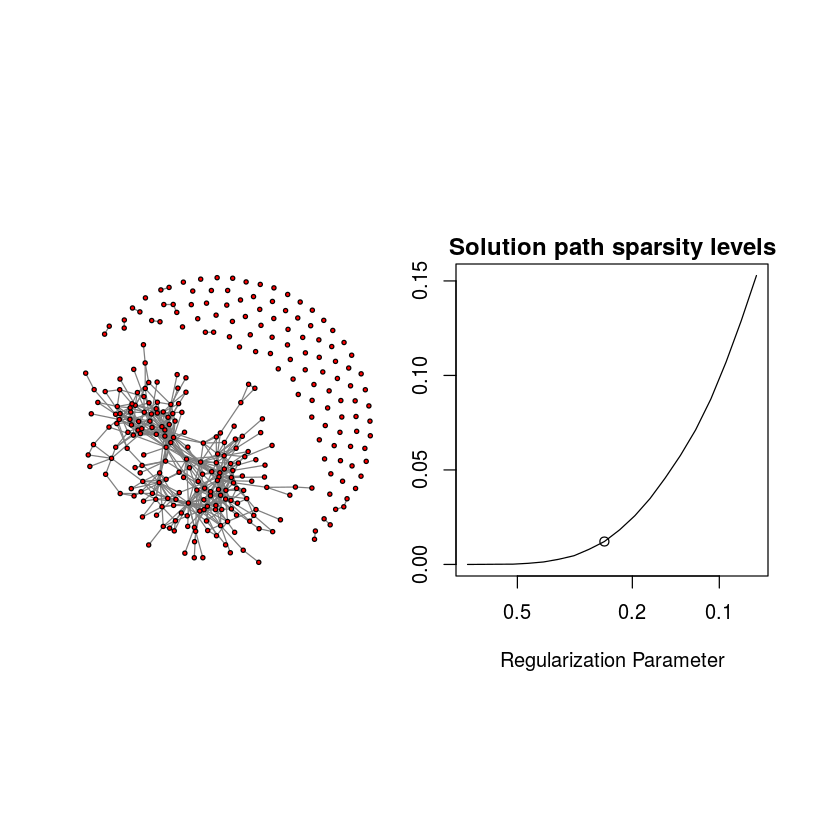

[1] "########Ending Gleesso analysis##########"


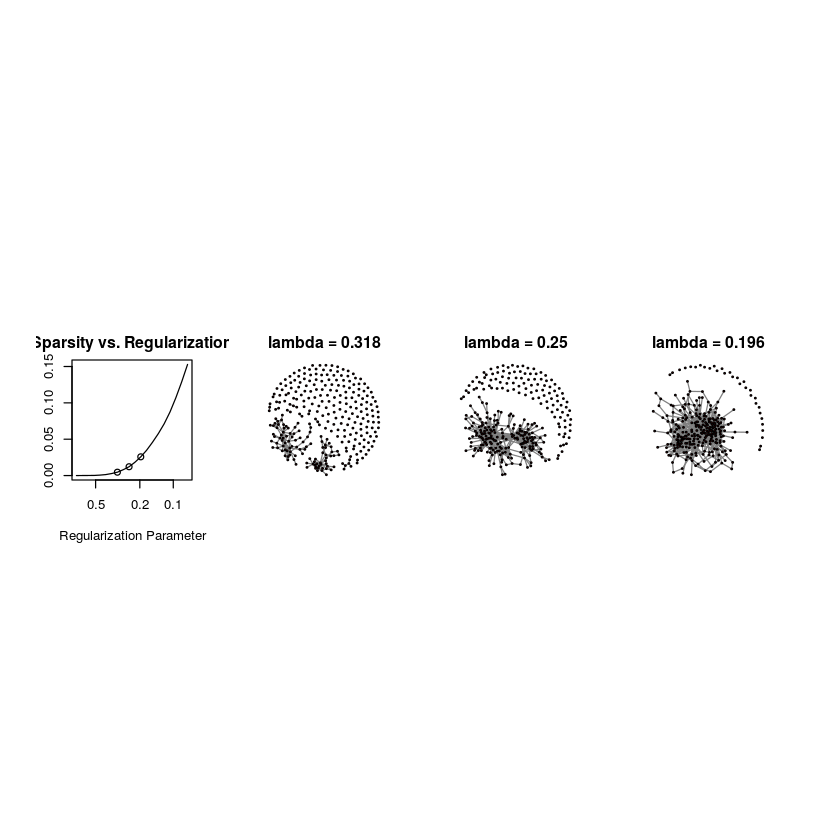

In [7]:
Gleesso_pipeline('./outputs/',
                                 mgs_igc_ch_da_file,
                                 taxo_9.9_file,
                                 './outputs/',
                                 './outputs/',
                                    selection_vector,
                                 "Gleesso_test",
                                 "default_param"
                                )

The pipeline as produced a graph file that we can open with gephi:

![gephi window]( ./images/gephi_1_graph.png "Gephi graph layout")

### Community analysis

Graph communities can be imported and analyzed as it is.

In [8]:
community_table = readRDS("./outputs/community_abondance_Gleesso_testdefault_param.rds")

In [9]:
head(community_table)

,Megamonas funiformis Escherichia coli,Acinetobacter sp. CAG:196,Akkermansia muciniphila Alistipes obesi,Alistipes putredinis Barnesiella intestinihominis,Butyrivibrio crossotus,Anaerostipes hadrus Dorea formicigenerans,Bacteroides cellulosilyticus Bacteroides intestinalis,Bacteroides plebeius Bacteroides coprocola,Bacteroides vulgatus Bacteroides uniformis,Bacteroides massiliensis Bacteroides finegoldii,⋯,Clostridium sp. CAG:492,Eubacterium sp. CAG:115,Roseburia inulinivorans Roseburia intestinalis,Faecalibacterium prausnitzii 2 ( A2 165),Oscillibacter sp.,Ruminococcaceae bacterium LM158,Roseburia sp. CAG:45,Ruminococcus sp. CAG:177 CAG00698,Prevotella sp. CAG:255,Prevotella copri Phascolarctobacterium succinatutens
Community_composition,Acidaminococcus intestini-Bacteroidales CAG00530-Bacteroides stercorirosoris-Bifidobacterium longum-Bifidobacterium pseudocatenulatum-Blautia sp. CAG:237-Blautia sp. CAG:52-Blautia wexlerae CAG00235-Clostridiales CAG01299-Clostridiales CAG01700-Clostridium bolteae-Clostridium sp. CAG:230-Clostridium sp. CAG:299-Clostridium sp. CAG:43-Clostridium sp. CAG:7-Coprococcus catus-Dialister sp. CAG:357-Escherichia coli-Eubacterium sp. CAG:192-Eubacterium sp. CAG:252-Eubacterium sp. CAG:274-Eubacterium sp. CAG:274 CAG01023-Flavonifractor plautii-Fusobacterium mortiferum-Haemophilus parainfluenzae-Klebsiella pneumoniae-Lachnospiraceae CAG00088-Megamonas funiformis-Megasphaera sp. BL7 NM10-Oscillibacter CAG01207-Parasutterella excrementihominis-Roseburia intestinalis CAG00411-Roseburia sp. CAG:182-Ruminococcus gnavus-Streptococcus salivarius-Sutterella sp. CAG:351 CAG00362-Tyzzerella nexilis-uncultured Faecalibacterium sp. CAG00042,Acinetobacter sp. CAG:196-CAG00302,Akkermansia muciniphila-Alistipes indistinctus-Alistipes obesi-Clostridium sp. CAG:138-Clostridium sp. CAG:226-Clostridium sp. CAG:302-Clostridium sp. CAG:452-Clostridium sp. CAG:798 CAG01062-Faecalibacterium 5 (sp. CAG:74)-Firmicutes CAG00559-Firmicutes CAG00572-Firmicutes CAG00669-Firmicutes CAG00854-Firmicutes bacterium CAG:110-Firmicutes bacterium CAG:124-Firmicutes bacterium CAG:124 CAG00497-Firmicutes bacterium CAG:124 CAG00509-Firmicutes bacterium CAG:129 uncultured Collinsella sp.-Firmicutes bacterium CAG:176-Firmicutes bacterium CAG:176 CAG00967-Firmicutes bacterium CAG:240-Firmicutes bacterium CAG:321-Mycoplasma sp. CAG:472-Oscillibacter CAG00676-Oscillibacter CAG00783-Oscillibacter sp. CAG:241 CAG00984-Prevotella sp. CAG:474-Roseburia CAG00869-Ruminococcus sp. CAG:177-Subdoligranulum sp. CAG:314-unclassified Firmicutes-unclassified Firmicutes CAG00670-unclassified Ruminococcaceae CAG00454,Alistipes onderdonkii-Alistipes putredinis-Alistipes shahii-Barnesiella intestinihominis-Odoribacter splanchnicus,Alistipes sp. CAG:435-Anaerotruncus sp. CAG:390-Butyrivibrio crossotus-CAG00838-Clostridium sp. CAG:288-Clostridium sp. CAG:307-Clostridium sp. CAG:349-Clostridium sp. CAG:413-Clostridium sp. CAG:433-Clostridium sp. CAG:508-Clostridium sp. CAG:524-Clostridium sp. CAG:533-Clostridium sp. CAG:557-Clostridium sp. CAG:567-Clostridium sp. CAG:628-Clostridium sp. CAG:628 CAG01170-Firmicutes CAG00513-Firmicutes CAG00965-Firmicutes bacterium CAG:170-Firmicutes bacterium CAG:194-Firmicutes bacterium CAG:238-Firmicutes bacterium CAG:313-Firmicutes bacterium CAG:321 CAG01173-Firmicutes bacterium CAG:460-Firmicutes bacterium CAG:475-Firmicutes bacterium CAG:552-Firmicutes bacterium CAG:95-Mycoplasma sp. CAG:611-Ruminococcaceae bacterium LM158 CAG00961-unclassified Clostridiales CAG01032-unclassified Clostridiales CAG01067-unclassified Firmicutes CAG00637,Anaerostipes hadrus-Clostridium CAG00223-Clostridium sp. CAG:122-Clostridium sp. CAG:7 CAG00460-Coprobacillus sp. CAG:235-Dorea formicigenerans-Dorea longicatena 2-Eubacterium desmolans CAG00974-Eubacterium sp. CAG:248-Eubacterium sp. CAG:38-Faecalibacterium prausnitzii 3 ( L2 6)-Firmicutes bacterium CAG:41-Lachnoclostridium CAG01228-Lachnospiraceae CAG00764-Lachnospiraceae CAG50001-Ruminococcus 

In [31]:
extract_community_abundance_table(community_table)

,Megamonas funiformis Escherichia coli,Acinetobacter sp. CAG:196,Akkermansia muciniphila Alistipes obesi,Alistipes putredinis Barnesiella intestinihominis,Butyrivibrio crossotus,Anaerostipes hadrus Dorea formicigenerans,Bacteroides cellulosilyticus Bacteroides intestinalis,Bacteroides plebeius Bacteroides coprocola,Bacteroides vulgatus Bacteroides uniformis,Bacteroides massiliensis Bacteroides finegoldii,⋯,Clostridium sp. CAG:492,Eubacterium sp. CAG:115,Roseburia inulinivorans Roseburia intestinalis,Faecalibacterium prausnitzii 2 ( A2 165),Oscillibacter sp.,Ruminococcaceae bacterium LM158,Roseburia sp. CAG:45,Ruminococcus sp. CAG:177 CAG00698,Prevotella sp. CAG:255,Prevotella copri Phascolarctobacterium succinatutens
BGI.06A,6.573572e-05,0.000000e+00,2.459654e-06,3.930584e-08,0.000000e+00,8.062217e-05,1.974942e-08,0.000000e+00,1.006940e-04,0.000000e+00,⋯,0.000000e+00,0.000000e+00,5.764663e-07,1.799474e-09,5.857946e-09,5.423138e-09,0.000000e+00,0.000000e+00,0.000000e+00,1.859743e-08
BGI.15A,5.445606e-06,0.000000e+00,4.238852e-05,2.204404e-05,1.612891e-05,2.872245e-06,2.975806e-06,1.316204e-05,4.930464e-05,1.949258e-05,⋯,0.000000e+00,5.405052e-07,1.383811e-07,1.627440e-06,5.436500e-08,2.731021e-06,3.532632e-07,6.930195e-08,0.000000e+00,0.000000e+00
BGI.17A,2.016781e-05,6.971253e-08,1.311198e-05,2.705067e-05,1.580992e-06,1.437805e-05,2.669444e-07,3.821357e-06,4.706097e-05,9.325766e-06,⋯,1.119860e-08,9.809994e-06,5.192288e-06,2.069978e-06,3.458396e-07,5.130677e-06,3.256903e-06,0.000000e+00,0.000000e+00,0.000000e+00
BGI.27A,6.339272e-06,0.000000e+00,1.340063e-05,1.284408e-05,8.507903e-07,3.391149e-06,9.495235e-07,5.640549e-05,6.318440e-05,1.048568e-07,⋯,8.393605e-07,1.074646e-07,3.658849e-07,2.095996e-06,2.615907e-07,3.601297e-06,2.770636e-06,0.000000e+00,0.000000e+00,5.623573e-08
BGI.28A,3.754055e-05,0.000000e+00,3.909519e-09,3.990983e-06,0.000000e+00,5.136440e-05,6.320996e-07,3.273459e-05,4.645092e-05,0.000000e+00,⋯,6.619543e-08,4.447541e-07,1.650877e-05,4.233722e-06,2.242588e-07,2.172880e-08,3.739678e-07,0.000000e+00,0.000000e+00,0.000000e+00
BGI.33A,4.874278e-05,0.000000e+00,1.769433e-06,3.740218e-06,0.000000e+00,8.902022e-06,2.876917e-09,5.912402e-06,1.112846e-05,3.583876e-06,⋯,0.000000e+00,0.000000e+00,3.919574e-06,1.437471e-05,8.618671e-08,3.557952e-06,1.053301e-07,0.000000e+00,0.000000e+00,6.253904e-05
BGI.34A,1.485136e-05,0.000000e+00,3.824777e-06,8.108192e-06,0.000000e+00,1.457574e-05,2.270447e-06,0.000000e+00,9.432922e-05,7.467098e-06,⋯,0.000000e+00,0.000000e+00,1.581422e-05,8.111398e-06,5.536026e-07,3.388310e-06,3.762458e-07,0.000000e+00,0.000000e+00,1.772123e-08
BGI001A,1.689133e-05,0.000000e+00,9.921972e-07,5.731403e-06,1.197542e-07,4.402970e-06,1.323191e-07,2.693016e-06,5.669270e-06,0.000000e+00,⋯,0.000000e+00,0.000000e+00,1.128032e-05,1.114958e-06,7.667841e-08,3.656365e-06,6.374506e-07,1.270604e-08,2.345338e-06,1.415224e-04
BGI002A,1.952267e-05,0.000000e+00,3.120833e-05,8.706892e-06,1.026396e-06,4.016658e-06,3.669445e-06,0.000000e+00,3.523740e-05,8.466330e-07,⋯,0.000000e+00,0.000000e+00,2.398072e-06,3.730747e-06,3.816639e-07,6.249008e-06,5.469531e-08,2.231433e-05,0.000000e+00,0.000000e+00
BGI003A,9.213860e-05,0.000000e+00,3.348930e-07,9.810224e-07,0.000000e+00,2.543543e-05,6.558223e-09,5.227326e-05,2.093131e-05,7.670756e-06,⋯,0.000000e+00,0.000000e+00,1.031085e-05,2.520895e-06,1.165539e-07,4.937417e-07,2.283006e-07,0.000000e+00,2.037146e-06,0.000000e+00


# Gleesso Bootstrap and robust communities


Community computed on one graph can seem arbitrary. Indeed, species at community borders could be attributed to another community if parameters where tweaked a little.

To have more robust community definition, the Gleesso_bootstrap runs the Gleesso_pipeline N times on different subsets of the cohort.  Gleesso_bootstrap also compute the graph on all 

It is possible to generate stratified subsets. If you provide a vector of factor the samples will all contain the same fraction of each modality. In our case we will 

Once the N graphs are generated they are used by the Robust_table_community to generate robust community definition.

[1] "_0.05"
[1] "Starting Gleesso analysis for:"
[1] "#################   healthy_Da_Chi_1__0.05   #################"
[1] "At analysis step :0"
[1] "Number of patient in the selection vector:"
[1] 382
[1] "mgs_tp"
[1] "Number of species:"
[1] 298


Normalizing/clr transformation of data with pseudocount ...
Inverse Covariance Estimation with glasso ...
Model selection with stars ...
Done!


[1] 0.2503729
[1] 0.01351321
[1] "###### Computing other community algorithm ######"
[1] "#####################################"
[1] "# Optimization of walktrap community#"
[1] "#####################################"
[1] "best number of steps:"
[1] 12
[1] "best modularity"
[1] 0.6818016
[1] "##### Modularity Walktrap:"
[1] 0.6818016
[1] "Modularity edge betweness:"
[1] 0.6410921
[1] "almost there"


GEXF graph successfully written at:
/home/hjulienne/Pipeline_development/Gleesso_pipeline/Gleesso_walkthrough/outputs/graph_healthy_Da_Chi_1_0.05.gexf


[1] "#############################"
[1] "#######  Community  #########"
[1] "Roseburia sp. CAG:45"
[1] "Community number"
[1] 16
[1] "represented by:"
[1] "Roseburia sp. CAG:45"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Akkermansia muciniphila Alistipes obesi"
[1] "Community number"
[1] 6
[1] "represented by:"
[1] " Akkermansia muciniphila Alistipes obesi"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Butyrivibrio crossotus unclassified Firmicutes"
[1] "Community number"
[1] 1
[1] "represented by:"
[1] " Butyrivibrio crossotus unclassified Firmicutes"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Alistipes finegoldii"
[1] "Community number"
[1] 10
[1] "represented by:"
[1] " Alistipes finegoldii"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Alistipes putredinis Barnesiella intestinihominis"
[1] "Community number"
[1] 12
[1] "represented by:"
[1] " Alistip

GEXF graph successfully written at:
/home/hjulienne/Pipeline_development/Gleesso_pipeline/Gleesso_walkthrough/outputs/graph_healthy_Da_Chi_1_0.05_community_tagged.gexf


[1] "########Ending Gleesso analysis##########"
[1] "_0.05"
[1] "Starting Gleesso analysis for:"
[1] "#################   healthy_Da_Chi_2__0.05   #################"
[1] "At analysis step :0"
[1] "Number of patient in the selection vector:"
[1] 382
[1] "mgs_tp"
[1] "Number of species:"
[1] 291


Normalizing/clr transformation of data with pseudocount ...
Inverse Covariance Estimation with glasso ...
Model selection with stars ...
Done!


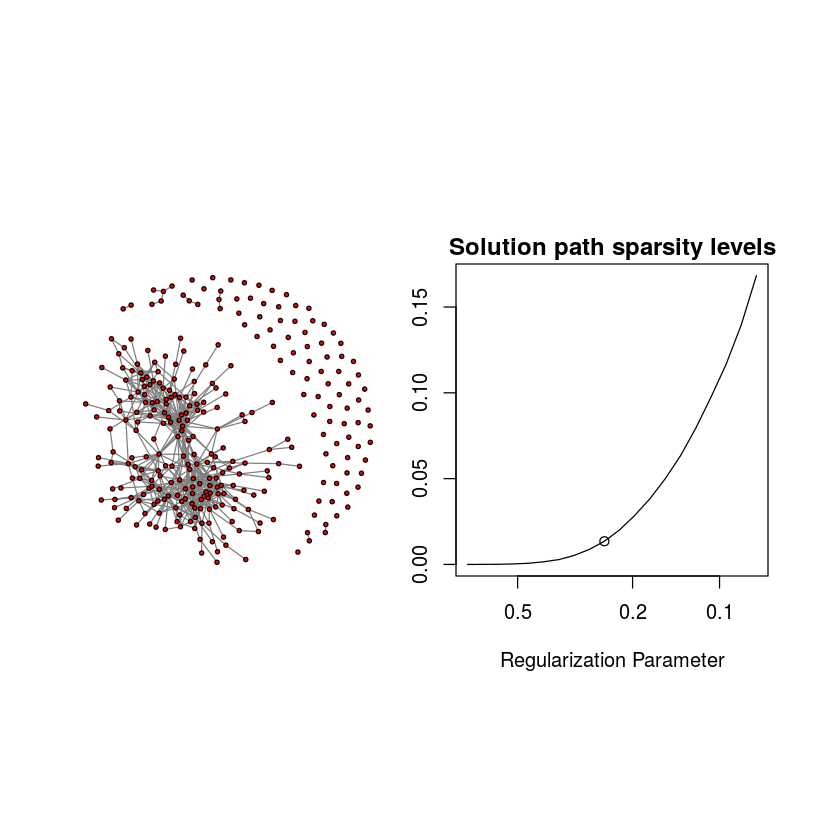

[1] 0.2595423
[1] 0.01206304


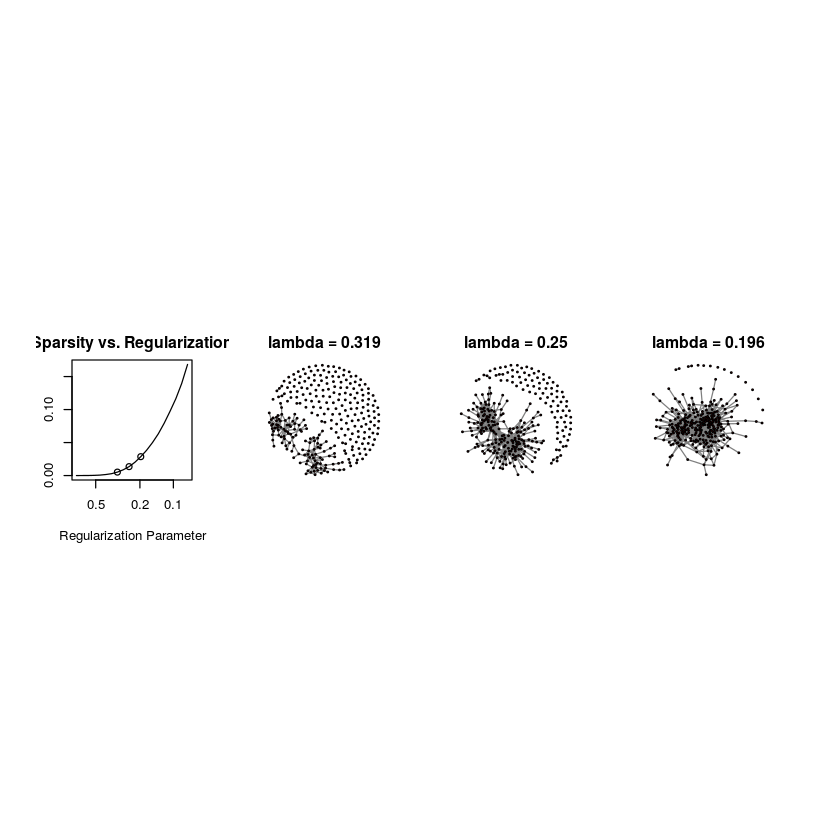

[1] "###### Computing other community algorithm ######"
[1] "#####################################"
[1] "# Optimization of walktrap community#"
[1] "#####################################"
[1] "best number of steps:"
[1] 7
[1] "best modularity"
[1] 0.672319
[1] "##### Modularity Walktrap:"
[1] 0.672319
[1] "Modularity edge betweness:"
[1] 0.6549122
[1] "almost there"


GEXF graph successfully written at:
/home/hjulienne/Pipeline_development/Gleesso_pipeline/Gleesso_walkthrough/outputs/graph_healthy_Da_Chi_2_0.05.gexf


[1] "#############################"
[1] "#######  Community  #########"
[1] "Roseburia sp. CAG:45"
[1] "Community number"
[1] 12
[1] "represented by:"
[1] "Roseburia sp. CAG:45"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Akkermansia muciniphila Alistipes indistinctus"
[1] "Community number"
[1] 8
[1] "represented by:"
[1] " Akkermansia muciniphila Alistipes indistinctus"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Alistipes onderdonkii Odoribacter splanchnicus"
[1] "Community number"
[1] 16
[1] "represented by:"
[1] " Alistipes onderdonkii Odoribacter splanchnicus"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Alistipes putredinis Barnesiella intestinihominis"
[1] "Community number"
[1] 10
[1] "represented by:"
[1] " Alistipes putredinis Barnesiella intestinihominis"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Megamonas funiformis Anaerostipes hadrus"
[

limit_output extension: Maximum message size of 10000 exceeded with 13103 characters

In [13]:
Gleesso_bootstrap(2, 0.8, "healthy_Da_Chi", 
                  NULL, "./outputs/",
                  "./outputs/", "./outputs/", 
                  "./data/MGS_IGC_healthy_CH_Da.rds",
                  "./data/taxo_hs_9.9_3463_cleaned_CAG_sup50_freeze1.rds",
                  stratifying_vector = as.character(meta_IGC[,'country'])
                     )

Once all graphs are computed the Robust_table_community function takes all community definitions on all random subsets as input . For each species, the function retrieve the community attribution in all graphs. We can then compute the number of times a species was attributed to a specific community (the **Stability_score**). 


In [15]:
taxo_by_species = readRDS("./outputs/taxo_by_species.rds")

In [16]:
robust_tables = Robust_table_community("./outputs/",
                    "./IGC_community_100_graph",
                      taxo_by_species
                      )

[1] "#########################"
[1] "# Plotting alluvial plot"
[1] "walktrap distance computing"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Eubacterium rectale Eubacterium eligens"
[1] "Community number"
[1] 0
[1] "represented by:"
[1] " Eubacterium rectale Eubacterium eligens"
[1] "#############################"
[1] "#######  Community  #########"
[1] "Acinetobacter sp. CAG:196"
[1] "Community number"
[1] 1
[1] "represented by:"
[1] "Acinetobacter sp. CAG:196"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Akkermansia muciniphila Alistipes obesi"
[1] "Community number"
[1] 2
[1] "represented by:"
[1] " Akkermansia muciniphila Alistipes obesi"
[1] "#############################"
[1] "#######  Community  #########"
[1] " Alistipes putredinis Barnesiella intestinihominis"
[1] "Community number"
[1] 3
[1] "represented by:"
[1] " Alistipes putredinis Barnesiella intestinihominis"
[1] "#############################"
[1] "####

In [32]:
?Gleesso_bootstrap

In [29]:
saveRDS(robust_tables, "./Robust_tables_100_graph.rds")

In [33]:
names(robust_tables)

[1] "stability"                                    
[2] "stab_n_taxo"                                  
[3] "Robust_community_stability_0.6"               
[4] "Robust_community_stability_0.6_silhouette_0.1"

In [36]:
head(robust_tables$Robust_community_stability_0.6)

Eubacterium rectale Eubacterium eligens                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
Community_composition Acetobacter sp. CAG:267-Alistipes sp. CAG:157-Alistipes sp. CAG:268-Azospirillum sp. CAG:239-Azospirillum sp. CAG:260-Bacteroides caccae-Bacteroides clarus-Bacteroides coprophilus-Bacteroides eggerthii-Bacteroides faecis-Bacteroides salyersiae-Bacteroides sp. CAG:144-Bacteroides sp. CAG:443-Burkholderiales CAG00663-Burkholderiales CAG01007-Clostridiales CAG00893-Clostridium sp. CAG:167-Clostridium sp. CAG:217-Clostridium sp. CAG:245-Clostridium sp. CAG:253-Clostridium sp. CAG:269-Clostridium sp. CAG:277-Clostridium sp. CAG:343-Clostridium sp. CAG:352-Clostridium sp. CAG:354-Clostridium sp. CAG:75-Coprobacter fastidiosus-Desulfovibrio piger-Dialister invisus-Eubacterium eligens-Eubacterium rectale-Eubacterium siraeum-Eubacterium sp. CAG:180-Eubacterium sp. CAG:202-Eubacterium sp. CAG:251-Eubacterium sp. CAG:86-Eubacterium ventriosum-Faecalibacterium 6 (sp. CAG:82)-Faecalibacterium prausnitzii 2 ( A2 165) CAG00297-Faecalibacterium prausnitzii 2 ( A2 165) CAG00547-Faecalibacterium prausnitzii 3 ( L2 6) CAG00619-Faecalibacterium prausnitzii 4 ( cf. KLE1255) CAG00495-Faecalibacterium prausnitzii 4 ( cf. KLE1255) CAG01039-Firmicutes bacterium CAG:102-Firmicutes bacterium CAG:103 CAG01225-Firmicutes bacterium CAG:124 CAG00994-Firmicutes bacterium CAG:176 CAG00773-Firmicutes bacterium CAG:270-Firmicutes bacterium CAG:341-Firmicutes bacterium CAG:56-Firmicutes bacterium CAG:65 CAG01015-Holdemanella biformis-Holdemanella biformis CAG00807-Oscillibacter sp. CAG:241-Parabacteroides merdae-Paraprevotella clara-Prevotella CAG00375-Prevotella sp. CAG:279-Prevotella stercorea-Proteobacteria bacterium CAG:139 (Parasutterella) -Roseburia hominis-Roseburia sp. CAG:197-Roseburia sp. CAG:309 CAG00636-Roseburia sp. CAG:380-Ruminococcus bicirculans-Ruminococcus bromii-Ruminococcus callidus-Ruminococcus lactaris-Ruminococcus sp. CAG:254-Ruminococcus sp. CAG:353

The Robust_table_community output a list with 4 items.

* 'stability' and 'stab_n_taxo' : tables that contains the **Stability_score** by species
* Robust_community_stability_0.6 : Communities constructed only on species with a stability score above 0.6
* Robust_community_stability_0.6_silhouette_0.1 : Communities constructed only on species with a stability score above 0.6 and a silhouette above 0.1. The silhouette is a clustering metric that assess how well a species is in community.

For instance, we can start to analyze the  Robust_community_stability_0.6 table. The function
*community_contrast_dashboard* plot, for each community, the boxplot of community abundance  for classes of samples. For instance, we can look at the distrribution of communities abundance in chinese samples versus danish samples.

In [38]:
unique(meta_IGS$country)

[1] CH Da
Levels: CH Da

notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


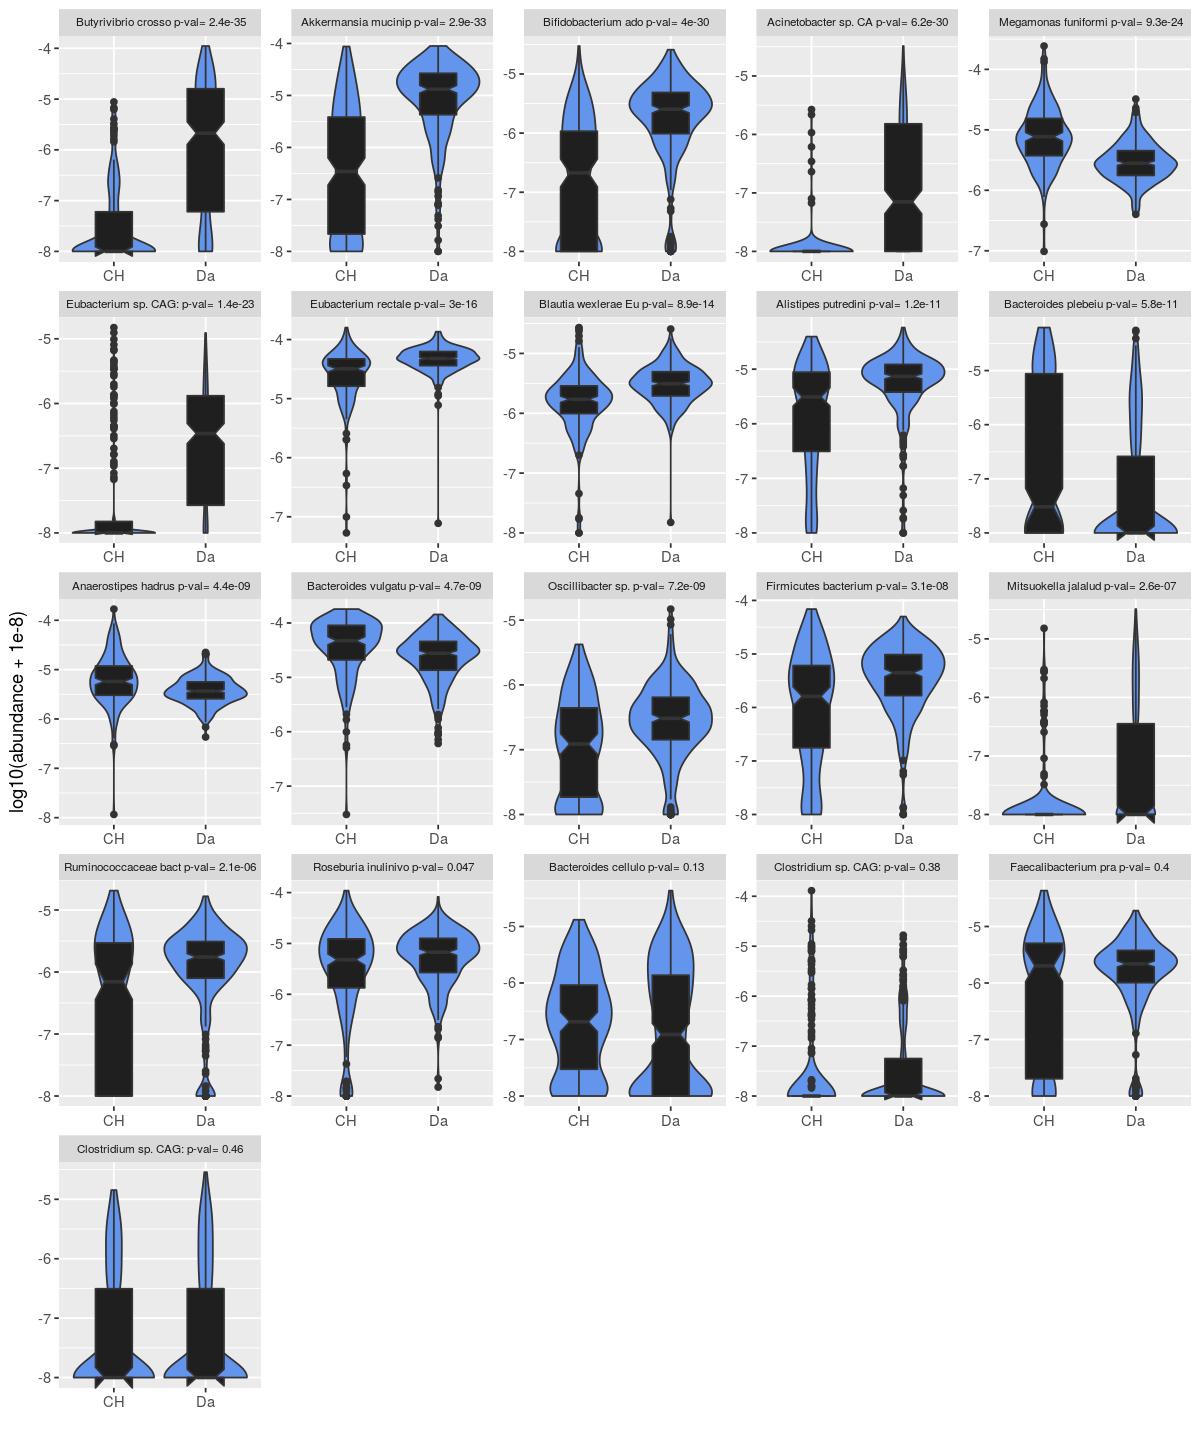

In [17]:
p_value = community_contrast_dashboard(robust_tables$Robust_community_stability_0.6,
                                "country",
                            meta_IGS$country, 
                                      nrow=5
                                      )

In [39]:
p_value

Eubacterium rectale Eubacterium eligens 
                                          2.965533e-16 
                             Acinetobacter sp. CAG:196 
                                          6.212647e-30 
               Akkermansia muciniphila Alistipes obesi 
                                          2.917934e-33 
     Alistipes putredinis Barnesiella intestinihominis 
                                          1.176722e-11 
             Anaerostipes hadrus Dorea formicigenerans 
                                          4.397640e-09 
                                Butyrivibrio crossotus 
                                          2.419545e-35 
 Bacteroides cellulosilyticus Bacteroides intestinalis 
                                          1.329208e-01 
            Bacteroides plebeius Bacteroides coprocola 
                                          5.764751e-11 
            Bacteroides vulgatus Bacteroides uniformis 
                                          4.677107e-09 
                          Bifidobacterium adolescentis 
                                          3.980318e-30 
              Megamonas funiformis Ruminococcus gnavus 
                                          9.304972e-24 
                   Blautia wexlerae Eubacterium hallii 
                                          8.905453e-14 
                               Mitsuokella jalaludinii 
                                          2.602515e-07 
                           Firmicutes bacterium CAG:65 
                                          3.053227e-08 
                               Clostridium sp. CAG:264 
                                          4.648007e-01 
                               Clostridium sp. CAG:492 
                                          3.786833e-01 
                               Eubacterium sp. CAG:115 
                                          1.422773e-23 
        Roseburia inulinivorans Roseburia intestinalis 
                                          4.663767e-02 
              Faecalibacterium prausnitzii 2 ( A2 165) 
                                          4.033006e-01 
                                     Oscillibacter sp. 
                                          7.155190e-09 
                       Ruminococcaceae bacterium LM158 
                                          2.079580e-06

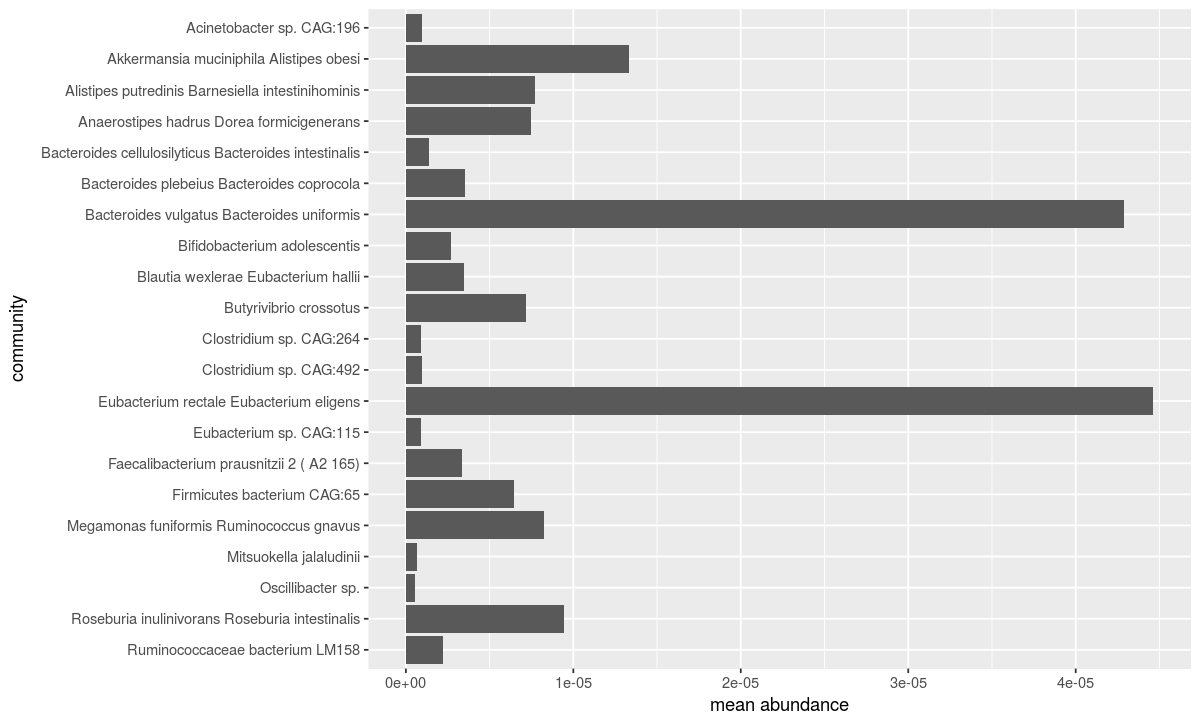

In [18]:
options(repr.plot.height= 6, repr.plot.width= 10)
# changer l'echelle en log
draw_community_total_abundance(abund = extract_community_abundance_table(robust_tables[["Robust_community_stability_0.6"]]))

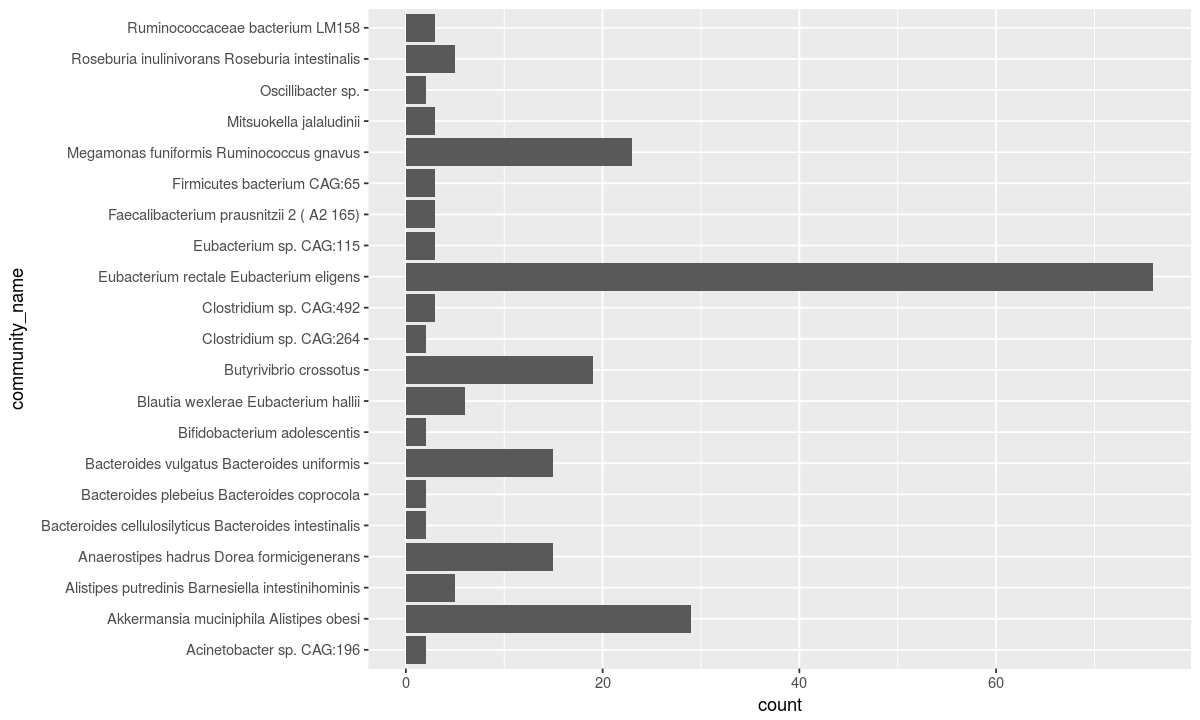

In [19]:
options(repr.plot.height= 6, repr.plot.width= 10)
draw_community_total_species_count(robust_tables[["Robust_community_stability_0.6"]])

## Tag the "all sample" graph with stable community

In [20]:
Nodes_all_samples = 
read.csv("./outputs/graph_healthy_Da_Chi_all_samples__nodes.csv", 
         row.names=1)

In [21]:
abund_by_species= readRDS("./outputs/abund_by_species.rds")

In [22]:
node_robust  = create_graph_robust_community_tags(
model_folder = "./outputs",
                                      "./Robust_tagged_100_graph",                                    
                                  abund_by_species,
                                      taxo_by_species,
                        "healthy_Da_Chi",
                                     robust_tables[["Robust_community_stability_0.6"]],
                            Nodes_all_samples
                                  )

[1] "node attribution done, regenerating the graph : "
[1] "almost there"


GEXF graph successfully written at:
/home/hjulienne/Pipeline_development/Gleesso_pipeline/Gleesso_walkthrough/Robust_tagged_100_graph.gexf.gexf


We can visualize le result : 
![gephi window]( ./images/graph_100_communities.png "Gephi graph layout")

### taxonomic description of communities

The community_taxa_abundance function generate plots to describes the taxonomic content of communities at different levels (genus to phylum).

In [23]:
com_tab = robust_tables[["Robust_community_stability_0.6"]]

In [24]:
abund_com = extract_community_abundance_table(com_tab)

In [27]:
trim_tab = community_taxa_abundance(Nodes =  node_robust,
                        abund_by_species,
                         "./images/Taxa_relative_abundance_",                         
                        community_kind = "additional_info"
                        )

![taxa compo]( ./images/Taxa_relative_abundance__genus_relative_barplot.png "Genus composition")